In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
path = "csv/"

In [3]:
version_mapping = {
    1: "ijk",
    2: "jik",
    3: "jki",
    4: "ikj",
    5: "kij",
    6: "kji"
}

In [4]:
version_mapping.values()

dict_values(['ijk', 'jik', 'jki', 'ikj', 'kij', 'kji'])

In [5]:
all_mat = [2048, 8192]
all_tiles = [4,8,16,32,64,128,256,512]
all_versions = list(range(1,7))

In [6]:
def query(df, versions = all_versions, mat = all_mat, tiles = all_tiles):
    return df[(df["version"].isin(versions)) & (df["matrix_size"].isin(mat)) & (df["tile_size"].isin(tiles))]

In [8]:
df = pd.concat([pd.read_csv(path + "summary_csv_int_8192.csv", index_col=0), pd.read_csv(path + "summary_csv_int_2048.csv", index_col=0)])
df["version_word"] = df["version"].apply(lambda x: version_mapping[int(x[1])])
df["version"] = df["version"].apply(lambda x: int(x[1]))
df["cache-hit-rate"] = 100*(1-df["cache-misses"]/df["cache-references"])
df["l1d-read-hit-rate"] = 100*(1-df["l1d-read-misses"]/df["l1d-read-accesses"])
df["ll-read-hit-rate"] = 100*(1-df["ll-read-misses"]/df["ll-read-accesses"])
df["IPC"] = df["instructions"]/df["cpu-cycles"]
df["time-elapsed"] = df["time-elapsed"].apply(lambda x: eval(x.split(".")[0].replace("m","*60*").replace("h","*3600*")))
df

,version,matrix_size,tile_size,instructions,cpu-cycles,branch-misses,branch-instructions,cache-references,cache-misses,dtlb-read-accesses,dtlb-read-misses,dtlb-write-misses,dtlb-write-accesses,l1d-read-accesses,l1d-read-misses,l1d-write-accesses,ll-read-accesses,ll-read-misses,ll-write-accesses,ll-write-misses,time-elapsed,page_fault,version_word,cache-hit-rate,l1d-read-hit-rate,ll-read-hit-rate,IPC
0,6,8192,8,25828147672293,8572364783866,1078259498,784676399861,112044107160,79652589978,8871438067508,15845558366,1270280762,1256103034638,8874080820227,58586771233,1256449022879,17697494545,13705369006,21272,13770,39780,0,kji,28.909612,99.339799,22.557575,3.012955
1,4,8192,8,25836139633268,6376008686654,1078449767,784975806096,7451850200,1378160317,8872964926772,52517391,129462,1256281106427,8874852162316,16319376115,1255963374152,818141035,66375249,17125,3451,48960,0,ikj,81.505797,99.816117,91.887065,4.052087
2,2,8192,4,27248747866721,9155486801154,8039091,1090647980035,105324901673,70434635852,9687388321981,33582344722,8250707,1460272622619,9692260628798,83436148840,1460261351156,35980132625,30451315915,2204161,867852,158400,0,jik,33.126322,99.139147,15.366304,2.976221
3,2,8192,64,24851895910355,8103868366516,8730637174,575781732329,403790175351,2546922881,8314822711971,147094237,130943,1116941651761,8317288887301,534057397242,1117081984040,195228517574,233073350,7978097,9741,113520,0,jik,99.369246,93.578949,99.880615,3.066671
4,1,8192,64,24852151995329,7506802923063,8733749983,575781893539,16219272895,1821410564,8314871269810,148726967,116656,1116937521712,8317122622882,532068373885,1117075025946,9507371858,195126150,2191497,2635,72000,0,ijk,88.770085,93.602735,97.947633,3.310617
5,2,8192,256,24760317169869,9037311214369,2156234475,556088956835,1025233326724,256304858,8262439740158,17593661,152813,1103812578576,8264565902416,549128645212,1103939420518,525644591467,16399459,29747437,1292,132480,0,jik,99.975000,93.355626,99.996880,2.739788
6,6,8192,512,24746501072059,9458838950150,1075937585,552863574977,1076998158844,3755053228,8253999905643,5279207,143245,1101671844898,8255856675955,550238301428,1101735934439,543149871125,1930681821,24672082,1336259,128520,0,kji,99.651341,93.335176,99.644540,2.616230
7,3,8192,128,24790749038134,8438006129614,4332403480,562596243091,383130490823,1305544505,8279574185827,71749987,239054,1108140197486,8282338187178,547778341768,1108326134941,205342484137,75004159,82470238,705,86400,0,jki,99.659243,93.386187,99.963474,2.937987
8,5,8192,8,25831057799230,6385803754752,1077655977,784819532116,7362014482,1369356648,8872651340532,56566966,11557164,1256441058578,8875452478599,16302588044,1256049780619,565966999,76512929,15944,552,55080,0,kij,81.399702,99.816318,86.481026,4.045075
9,2,8192,128,24790655392907,8467825269474,4331750058,562587890365,383809022296,927154742,8279561848226,41249966,134147,1108131342909,8282267636167,547714889952,1108382519718,205080996297,46140324,41492306,935,110700,0,jik,99.758433,93.386897,99.977501,2.927630


In [9]:
df.columns

Index(['version', 'matrix_size', 'tile_size', 'instructions', 'cpu-cycles',
       'branch-misses', 'branch-instructions', 'cache-references',
       'cache-misses', 'dtlb-read-accesses', 'dtlb-read-misses',
       'dtlb-write-misses', 'dtlb-write-accesses', 'l1d-read-accesses',
       'l1d-read-misses', 'l1d-write-accesses', 'll-read-accesses',
       'll-read-misses', 'll-write-accesses', 'll-write-misses',
       'time-elapsed', 'page_fault', 'version_word', 'cache-hit-rate',
       'l1d-read-hit-rate', 'll-read-hit-rate', 'IPC'],
      dtype='object')

In [10]:
# plt.style.use("fivethirtyeight")
font_size = 10

plt.style.use("default")
plt.rcParams["pdf.fonttype"] = 42
plt.rc("font", size=font_size)  # controls default text sizes
plt.rc("axes", titlesize=font_size)  # fontsize of the axes title
plt.rc("axes", labelsize=font_size)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=font_size)  # fontsize of the tick labels
plt.rc("ytick", labelsize=font_size)  # fontsize of the tick labels
plt.rc("legend", fontsize=font_size)  # legend fontsize
plt.rc("figure", titlesize=22)  # fontsize of the figure title

version_ticks = [""] + [version_mapping[i] for i in range(1,7)] + [""]


/tmp/ipykernel_140110/1525150745.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)


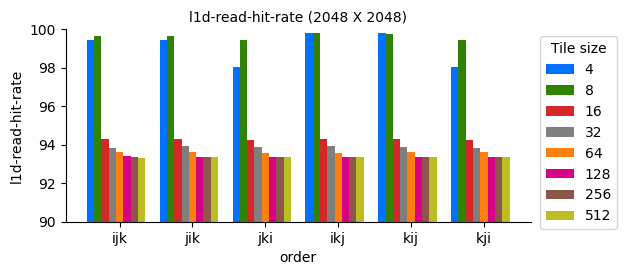

In [11]:
parameter = "l1d-read-hit-rate"
mat = 2048
colors = ["#0072ff","#308203","tab:red","tab:grey","tab:orange","#d80085","tab:brown","tab:olive","tab:cyan"]

fig = plt.figure(figsize=(6,2.5))
ax = fig.gca()
for ind,tile in enumerate(all_tiles):
    df_tile = query(df, tiles=[tile], mat = [mat])
#     ax.bar(np.array(df_tile["version"])+0.1*(ind-4), np.log2(df_tile[parameter]), width=0.1, label=tile, color=[colors[ind]]*len(df_tile))
    ax.bar(np.array(df_tile["version"])+0.1*(ind-4), df_tile[parameter], width=0.1, label=tile, color=[colors[ind]]*len(df_tile))
    
fig.canvas.draw()
ax.set_xticklabels(version_ticks)
ax.set_ylabel(parameter)
ax.set_ylim(90,100)
ax.set_xlabel("order")
ax.set_title(parameter + f" ({mat} X {mat})")
sns.despine()
plt.legend(bbox_to_anchor=(1.2,1), title="Tile size");

# ax.set_yticklabels(["$2^{"+ each.get_text() + "}$" for each in ax.get_yticklabels()]);

# plt.savefig(f"images/{parameter}_{mat}.pdf",bbox_inches="tight",pad_inches=0)

In [12]:
tile_ticks = [""] + [int(i) for i in list(np.logspace(2,9, base=2,num=8))] +[""]
tile_ticks

['', 4, 8, 16, 32, 64, 128, 256, 512, '']

/tmp/ipykernel_140110/931398408.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tile_ticks)


FileNotFoundError: [Errno 2] No such file or directory: 'images/l1d-read-hit-rate_8192.pdf'

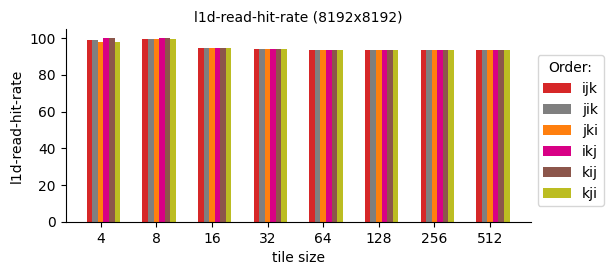

In [13]:
parameter = "l1d-read-hit-rate"
colors = ["tab:red","tab:grey","tab:orange","#d80085","tab:brown","tab:olive","tab:cyan"]
mat = 8192

fig = plt.figure(figsize=(6,2.5))
ax = fig.gca()
for ver in range(1,7):
    df_tile = query(df, versions=[ver], mat=[mat])
    ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(ver-3), df_tile[parameter], width=0.1, label=version_mapping[ver], color=[colors[ver-1]]*len(df_tile))
#     ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), np.log2(df_tile[parameter]), width=0.1, label=version_mapping[ver], color=[colors[ver]]*len(df_tile))
    
fig.canvas.draw()
ax.set_ylabel(parameter)
ax.set_xlabel("tile size")
ax.set_xticklabels(tile_ticks)
ax.set_title(f"{parameter} ({mat}x{mat})")
sns.despine()
# ax.set_yticklabels(["$2^{"+ each.get_text() + "}$" for each in ax.get_yticklabels()]);
plt.legend(bbox_to_anchor=(1.,0.9), title = "Order:")
plt.savefig(f"images/{parameter}_{mat}.pdf",bbox_inches="tight",pad_inches=0)

In [ ]:
parameter = "dtlb-read-misses"
colors = ["tab:red","tab:grey","tab:orange","#d80085","tab:brown","tab:olive","tab:cyan"]
mat = 2048

fig = plt.figure(figsize=(6,2.5))
ax = fig.gca()
for ver in range(1,7):
    df_tile = query(df, versions=[ver], mat=[mat])
#     ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), df_tile[parameter], width=0.1, label=version_mapping[ver], color=[colors[ver-1]]*len(df_tile))
    ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(ver-3), np.log2(df_tile[parameter]), width=0.1, label=version_mapping[ver], color=[colors[ver]]*len(df_tile))
    
fig.canvas.draw()
ax.set_ylabel(parameter)
ax.set_xlabel("tile size")
ax.set_xticklabels(tile_ticks)
ax.set_title(f"{parameter} ({mat}x{mat})")
sns.despine()
ax.set_yticklabels(["$2^{"+ each.get_text() + "}$" for each in ax.get_yticklabels()]);
plt.legend(bbox_to_anchor=(1.,0.9), title = "Order:")
plt.savefig(f"images/{parameter}_{mat}.pdf",bbox_inches="tight",pad_inches=0)

In [ ]:
parameter = "ll-read-hit-rate"
colors = ["tab:red","tab:grey","tab:orange","#d80085","tab:brown","tab:olive","tab:cyan"]

def plot_parameter_tile(ax, parameter, mat):
    for ver in range(1,7):
        df_tile = query(df, versions=[ver], mat=[mat])
        ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(ver-3), 
               df_tile[parameter], width=0.1, label=version_mapping[ver], color=[colors[ver]]*len(df_tile))
        
    
    ax.set_yticks([0,25,50,75,100])
    ax.set_ylabel("L3 Read\nHit Ratio (%)");
    ax.set_title(f" {mat}x{mat} ")
    sns.despine()
    

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,3.5), sharex=True)
plot_parameter_tile(ax1, parameter, 2048)
plot_parameter_tile(ax2, parameter, 8192)
ax1.legend(bbox_to_anchor=(1,0.7), title="Order");
ax2.set_xlabel("tiles")
ax2.set_xticks(range(1,11))
ax2.set_xticklabels([""] + list(map(int,np.logspace(2,9, base=2,num=8))) +[""]);
plt.savefig(f"images/{parameter}_2048_8192.pdf",bbox_inches="tight",pad_inches=0)

/tmp/ipykernel_140110/650487010.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)


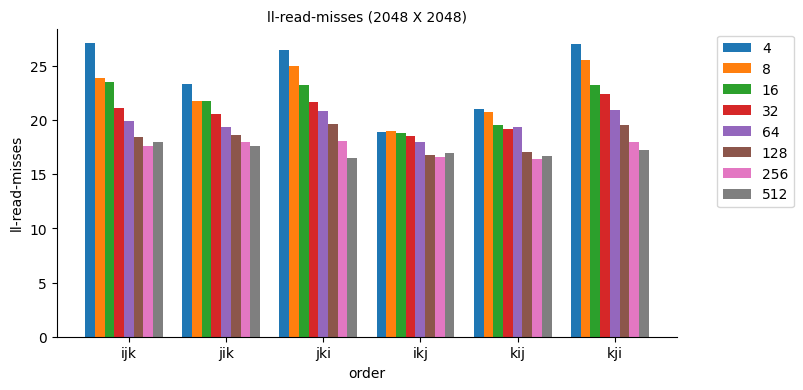

In [14]:
parameter = "ll-read-misses"

fig = plt.figure(figsize=(8,4))
ax = fig.gca()
for ind,tile in enumerate(all_tiles):
    df_tile = query(df, tiles=[tile], mat = [2048])
    ax.bar(np.array(df_tile["version"])+0.1*(ind-4), np.log2(df_tile[parameter]), width=0.1, label=tile)
#     ax.bar(np.array(df_tile["version"])+0.1*(ind-4), df_tile[parameter], width=0.1, label=tile)
    
ax.set_xticklabels(version_ticks)
ax.set_ylabel(parameter)
ax.set_xlabel("order")
ax.set_title(parameter + " (2048 X 2048)")
sns.despine()
plt.legend(bbox_to_anchor=(1.2,1))

In [15]:
l = ax.get_yticklabels()[1]
l

Text(0, 5.0, '5')

In [16]:
"2^"+l.get_text()

'2^5'

/tmp/ipykernel_140110/2391843965.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)


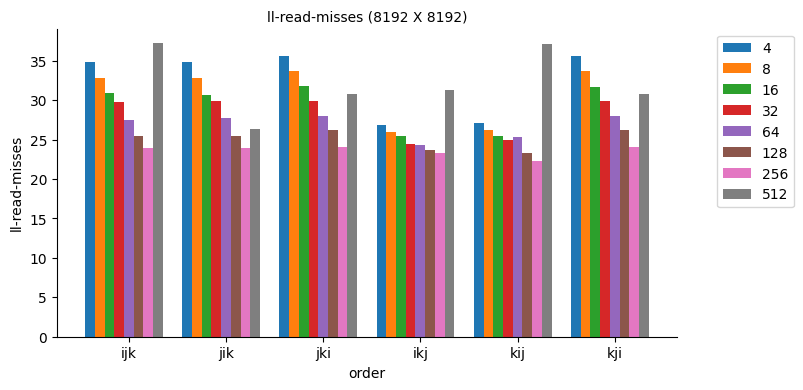

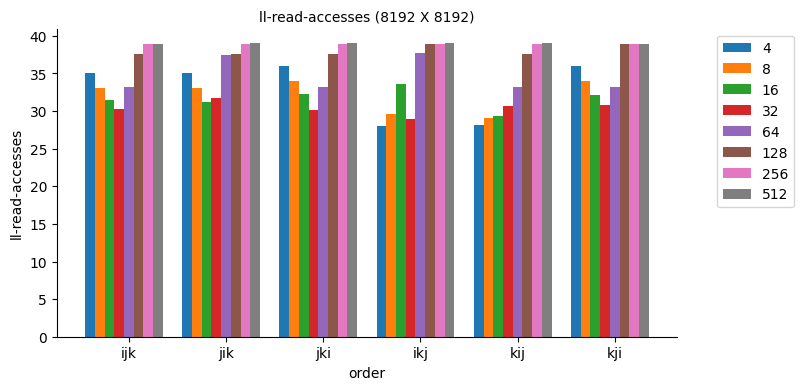

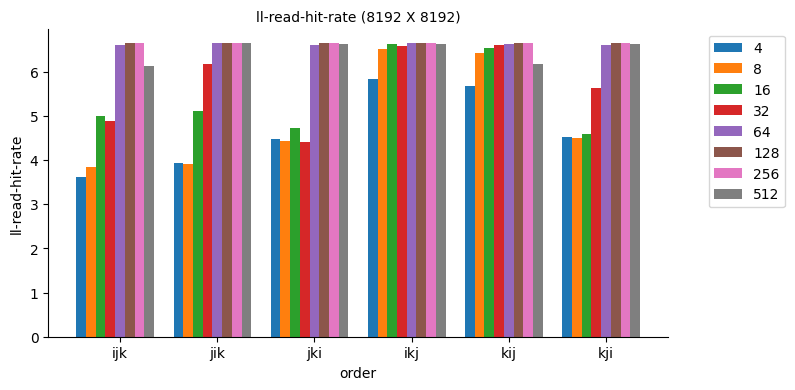

In [17]:
# parameter = 
for parameter in ["ll-read-misses","ll-read-accesses","ll-read-hit-rate"]:
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ind,tile in enumerate(all_tiles):
        df_tile = query(df, tiles=[tile], mat = [8192])
        ax.bar(np.array(df_tile["version"])+0.1*(ind-4), np.log2(df_tile[parameter]), width=0.1, label=tile)
    ax.set_xticklabels(version_ticks)
    ax.set_ylabel(parameter)
    ax.set_xlabel("order")
    ax.set_title(parameter + " (8192 X 8192)")
    sns.despine()
    plt.legend(bbox_to_anchor=(1.2,1))

/tmp/ipykernel_140110/1287444454.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)


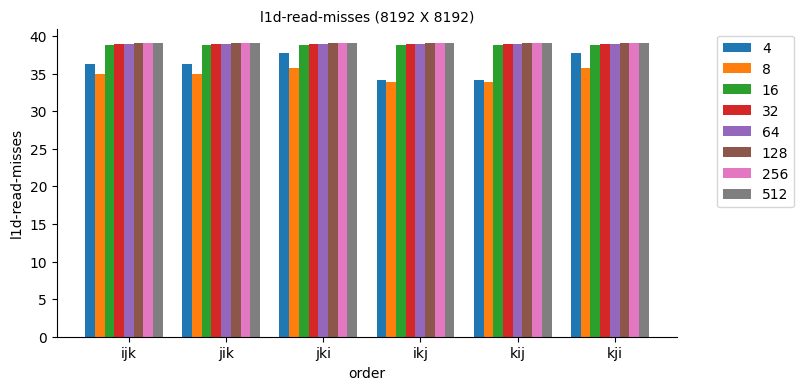

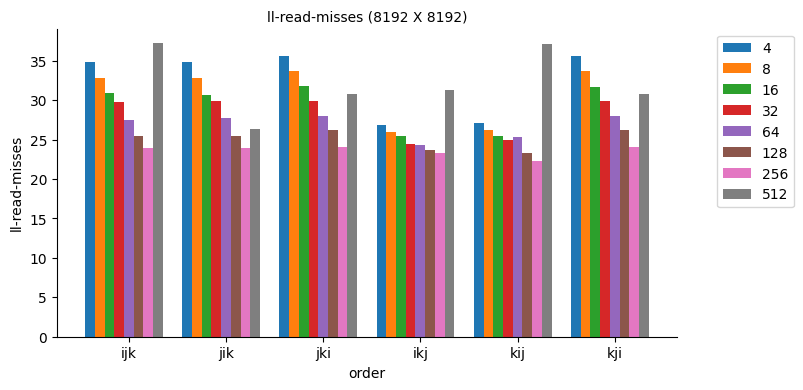

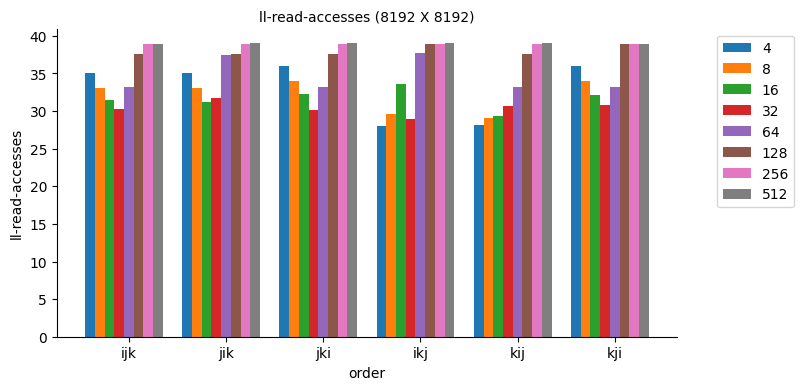

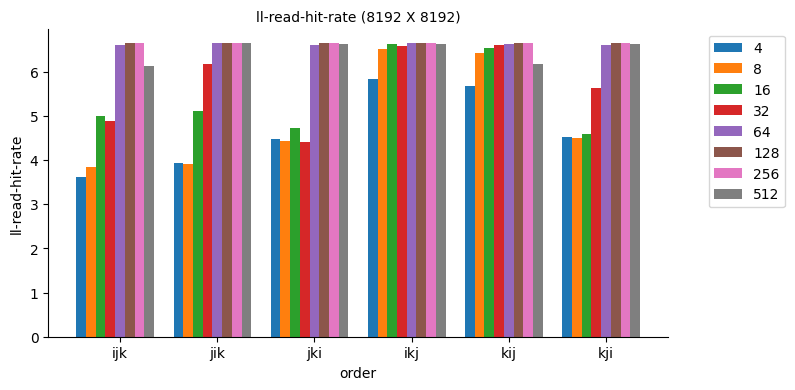

In [18]:
# parameter = 
for parameter in ["l1d-read-misses","ll-read-misses","ll-read-accesses","ll-read-hit-rate"]:
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ind,tile in enumerate(all_tiles):
        df_tile = query(df, tiles=[tile], mat = [8192])
        ax.bar(np.array(df_tile["version"])+0.1*(ind-4), np.log2(df_tile[parameter]), width=0.1, label=tile)
    ax.set_xticklabels(version_ticks)
    ax.set_ylabel(parameter)
    ax.set_xlabel("order")
    ax.set_title(parameter + " (8192 X 8192)")
    sns.despine()
    plt.legend(bbox_to_anchor=(1.2,1))

In [19]:
df[(df["matrix_size"] == 8192) & (df["version"] == 4)]

,version,matrix_size,tile_size,instructions,cpu-cycles,branch-misses,branch-instructions,cache-references,cache-misses,dtlb-read-accesses,dtlb-read-misses,dtlb-write-misses,dtlb-write-accesses,l1d-read-accesses,l1d-read-misses,l1d-write-accesses,ll-read-accesses,ll-read-misses,ll-write-accesses,ll-write-misses,time-elapsed,page_fault,version_word,cache-hit-rate,l1d-read-hit-rate,ll-read-hit-rate,IPC
1,4,8192,8,25836139633268,6376008686654,1078449767,784975806096,7451850200,1378160317,8872964926772,52517391,129462,1256281106427,8874852162316,16319376115,1255963374152,818141035,66375249,17125,3451,48960,0,ikj,81.505797,99.816117,91.887065,4.052087
12,4,8192,128,24790500437311,9003823310921,4329236986,562604694376,1048155711148,574288503,8279805503731,5873373,139473,1108157881379,8282184057707,545808390765,1108323304489,529315993579,13157127,15297202,1853,100800,0,ikj,99.945210,93.409850,99.997514,2.753330
16,4,8192,4,27202727906620,6356985568869,8903053,1088406463366,8628492321,2154592040,9677333162576,608953200,383782244,1459653128833,9700161324264,18625644781,1462579006383,280031977,118760418,4997,1929,36720,0,ikj,75.029334,99.807986,57.590408,4.279187
18,4,8192,16,25242231697810,7296993580753,7261767511,659425666832,21126872724,715565370,8537718770156,29223669,100843,1172792390092,8542723234119,456714189279,1172968865120,13483447752,45278966,2469586,4717,51480,0,ikj,96.613009,94.653763,99.664189,3.459265
21,4,8192,256,24759066492457,9021905731324,2156165471,556062149717,1025505172488,278680019,8262161629716,7417086,157314,1103814150658,8265078395811,549194036990,1104055764817,526053546510,10371711,39757908,17306,118080,0,ikj,99.972825,93.355247,99.998028,2.744328
30,4,8192,512,24742540055893,9410169080507,1075786801,552799024571,1084264739701,5201311147,8253372630960,6706869,142753,1101647156231,8256480783881,550335177007,1101863520469,546882978770,2659067963,19159608,2119564,110160,0,ikj,99.520291,93.334507,99.513778,2.629341
33,4,8192,64,24851359945570,8468682342559,8728994510,575746787318,355054864850,780407902,8314395891573,11365462,150160,1116927207537,8318430991714,540504128997,1117239366235,219198753949,21643006,33642081,8755,113400,0,ikj,99.780201,93.502331,99.990126,2.934501
34,4,8192,32,24978086014439,7506006658022,17754504550,602790069350,3260106044,317761748,8386951148023,17453060,112197,1134972446507,8389769917007,507155147455,1135137744343,495543244,23428195,31454,399,72000,0,ikj,90.253024,93.955077,95.272220,3.327746


<BarContainer object of 8 artists>

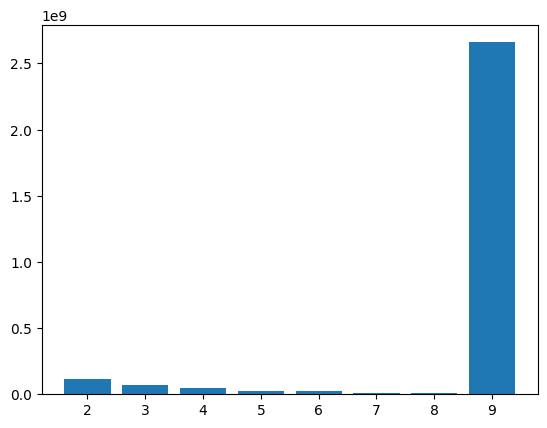

In [20]:
temp = query(df, versions=[4], mat = [8192])
plt.bar(np.log2(temp["tile_size"]),temp["ll-read-misses"])